# Bitcoin Supply Analysis

In [1]:
# dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# store file path 
# data source: blockchain.info
path_supply = os.path.join('data_input', 'supply-bitcoins-2017_data.csv')
# data source: Yahoo Finance
path_price = os.path.join('data_input', 'price-bitcoins_2017_data.csv')

# store in dataframe
df_supply = pd.read_csv(path_supply)
df_price = pd.read_csv(path_price)

df = pd.merge(df_supply, df_price, on='Date')

df.head()

,Date,Day,In Circulation,Open,High,Low,Close,Adj Close,Volume
0,1/1/2017,1,16077350.0,963.380005,1001.609985,956.099976,995.440002,995.440002,40570922
1,1/2/2017,2,16079337.5,995.440002,1031.680054,990.200012,1017.049988,1017.049988,66038073
2,1/3/2017,3,16081387.5,1017.049988,1035.469971,1006.530029,1033.300049,1033.300049,56085870
3,1/4/2017,4,16083300.0,1033.300049,1148.540039,1022.320007,1135.410034,1135.410034,170584623
4,1/5/2017,5,16085050.0,1135.410034,1150.630005,874.530029,989.349976,989.349976,244839289


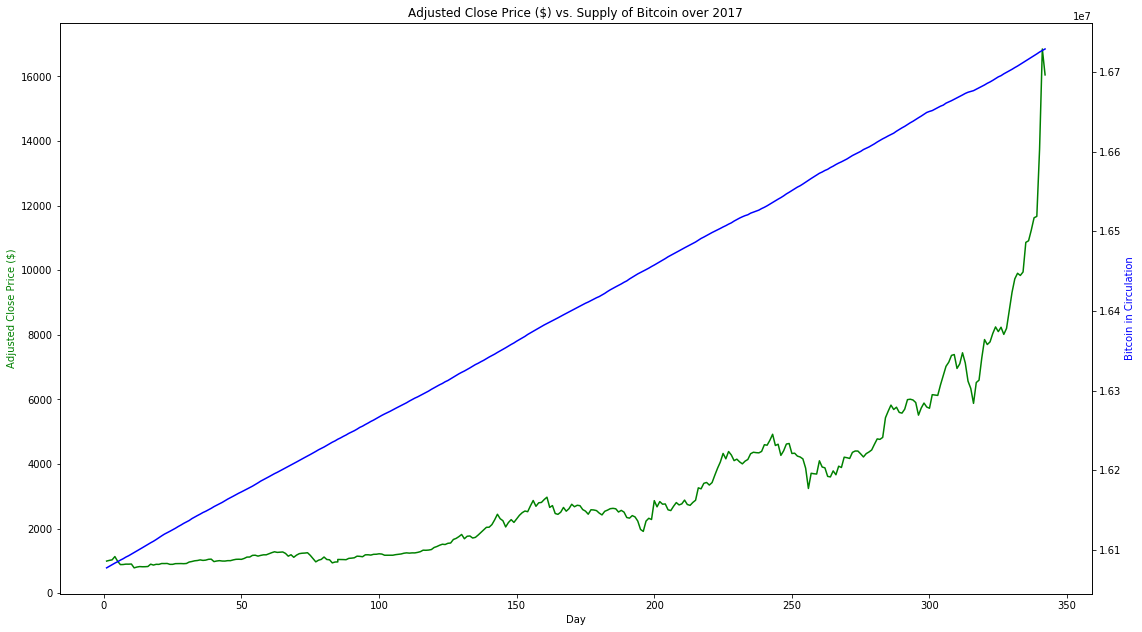

In [3]:
# plot
x = df['Day']
y1 = df['Adj Close']
y2 = df['In Circulation']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Day')
ax1.set_ylabel('Adjusted Close Price ($)', color='g')
ax2.set_ylabel('Bitcoin in Circulation', color='b')
plt.title('Adjusted Close Price ($) vs. Supply of Bitcoin over 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('results_output/bitcoin_price_vs_supply.png')
plt.show()

In [4]:
# Calculate percentage changes and add colums
df['Percentage Change in Circulation'] = df['In Circulation'].pct_change()
df['Percentage Change in Price'] = df['Adj Close'].pct_change()

df.to_csv('results_output/percent_changes_results.csv')

df.head()

,Date,Day,In Circulation,Open,High,Low,Close,Adj Close,Volume,Percentage Change in Circulation,Percentage Change in Price
0,1/1/2017,1,16077350.0,963.380005,1001.609985,956.099976,995.440002,995.440002,40570922,NaN,NaN
1,1/2/2017,2,16079337.5,995.440002,1031.680054,990.200012,1017.049988,1017.049988,66038073,0.000124,0.021709
2,1/3/2017,3,16081387.5,1017.049988,1035.469971,1006.530029,1033.300049,1033.300049,56085870,0.000127,0.015978
3,1/4/2017,4,16083300.0,1033.300049,1148.540039,1022.320007,1135.410034,1135.410034,170584623,0.000119,0.098819
4,1/5/2017,5,16085050.0,1135.410034,1150.630005,874.530029,989.349976,989.349976,244839289,0.000109,-0.128641


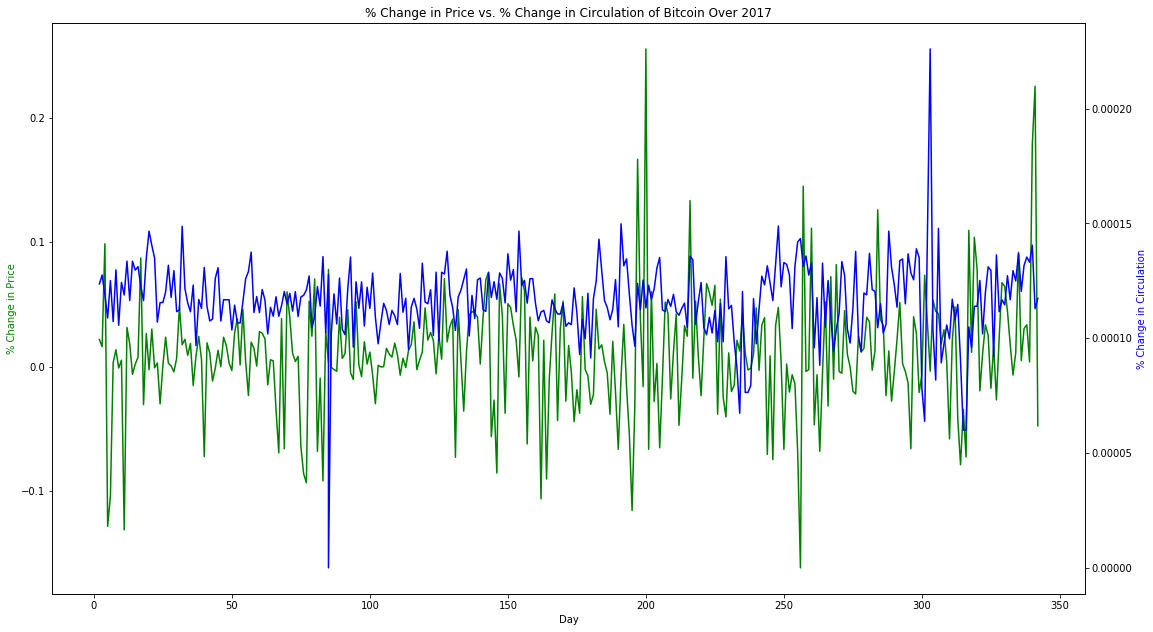

In [5]:
# plot
x = df['Day']
y1 = df['Percentage Change in Price']
y2 = df['Percentage Change in Circulation']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Day')
ax1.set_ylabel('% Change in Price', color='g')
ax2.set_ylabel('% Change in Circulation', color='b')
plt.title('% Change in Price vs. % Change in Circulation of Bitcoin Over 2017')
fig.set_size_inches(18.5, 10.5)
plt.savefig('results_output/bitcoin_percent_changes.png')
plt.show()